# Clustering

`it is unsupervised learning method` <br>



## Types of Clustering:

- hard clustering 

- soft clustering

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.datasets import make_blobs

In [7]:
blob_centers = np.array([
    [0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.8,1.3]
])

blob_std= np.array([0.4,0.3,0.1,0.1,0.1])

In [8]:
X,y =make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=29)


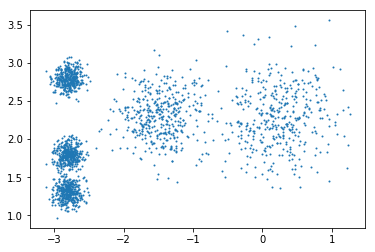

In [10]:
def plot_cluster(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
plot_cluster(X)    
plt.show()


In [11]:
from sklearn.cluster import KMeans

k=5
kmeans= KMeans(n_clusters=5,random_state=29)
y_pred=kmeans.fit_predict(X)

In [12]:
y_pred

array([4, 1, 0, ..., 2, 3, 0])

In [13]:
kmeans.labels_

array([4, 1, 0, ..., 2, 3, 0])

In [14]:
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 0, 4, 4])

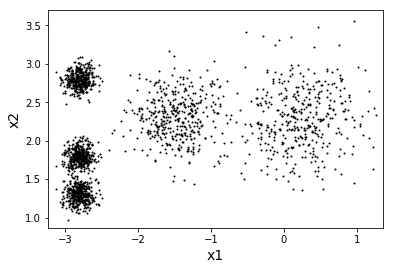

In [37]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize=2)
    
def plot_centroids(centroids,weights=None,circle_color='r', cross_color='k'):
    if weights is not None:
        centroids= centroids[weights>weights.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',s=30,linewidths=8,colors=circle_color,zorder=10,alpha=0.9)
    
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,linewidths=8,colors=cross_color,zorder=11,alpha=1)
    
def plot_decision_boundaries(clusterer,X,resolution=100,show_centroids=True,show_xlab=True,show_ylab=True):
    
    mins= X.min(axis=0)-0.1
    maxs= X.max(axis=0)+0.1
    
    xx,yy= np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                       np.linspace(mins[1],maxs[1],resolution))
    Z= clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],mins[1]),cmap="jet")
    
    plt.contour(Z,extent=(mins[0],maxs[0],mins[1],mins[1]),linewidths=1,colors='k')
    plot_data(X)
    #if show_centroids:
        #plot_data(centroids)
    if show_xlab:
        plt.xlabel("x1",fontsize=14)
    else:
         plt.tick_params(labelleft=False)
    if show_ylab:
        plt.ylabel("x2",fontsize=14)
    else:
        plt.tick_params(labelleft=False)
plot_decision_boundaries(kmeans,X)
plt.show()

**Elbow Curve Method**

In [27]:
kmeans.inertia_

219.6475514904845

In [28]:
kmeans_per_k=[KMeans(n_clusters=k,random_state=20).fit(X) for k in range(1,10)]

inertias=[model.inertia_ for model in kmeans_per_k]


AttributeError: Unknown property arrowpops

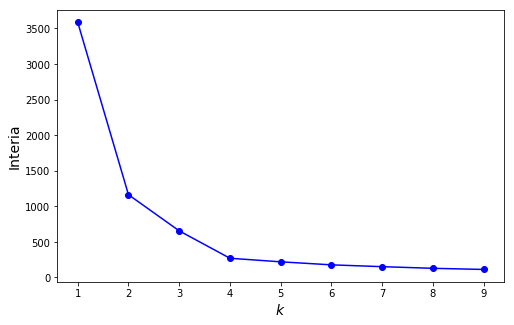

In [47]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10),inertias,'bo-')
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Interia",fontsize=14)
plt.annotate('Elbow',xy=(4,inertias[3]),
            xytext=(0.55,0.55),
            textcoords="figure fraction",
            fontsize=14,
            arrowpops=dict(facecolor='black',shrink=0.1)
            )
plt.show()

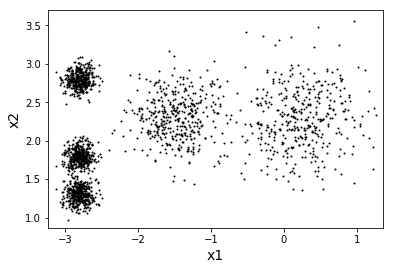

In [34]:
plot_decision_boundaries(kmeans_per_k[3],X)
plt.show()

## K-mode Clustering

'k-mode is basically used for categorical data'

the only dif from k-means is that instead of evaluating the mean for the next centroid its basically compute the mode of all the instances in that perticulat cluster


In [39]:
from kmodes.kmodes import KModes

ModuleNotFoundError: No module named 'kmodes'

## Heirarchical Clustering

   

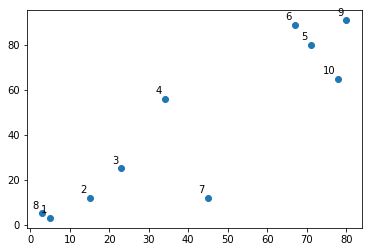

In [42]:
X= np.array([[5,3],
           [15,12],
           [23,25],
           [34,56],
           [71,80],
           [67,89],
           [45,12],
           [3,5],
           [80,91],
            [78,65]])
labels=range(1,11)

plt.scatter(X[:,0],X[:,1],label='True Position')

for label, x, y in zip(labels,X[:,0],X[:,1]):
    plt.annotate(label,xy=(x,y),
                xytext=(-3,3),
                textcoords='offset points',ha='right',va='bottom')
plt.show()

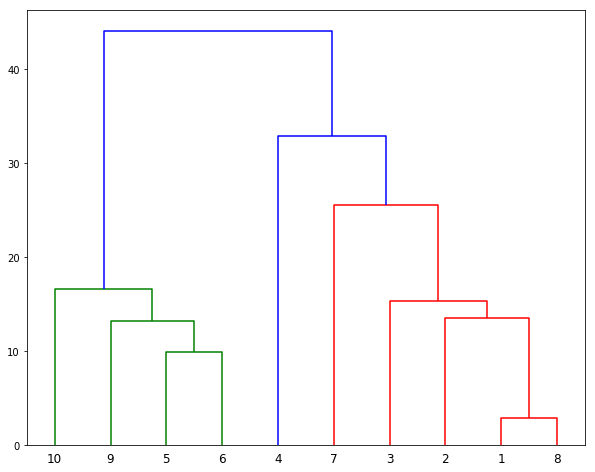

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage

linked = linkage(X,'single')
label_list= range(1,11)
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',labels=label_list,
          distance_sort='decending',
          show_leaf_counts=True)
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluste= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluste.fit_predict(X)

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

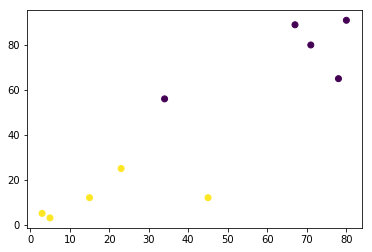

In [57]:
plt.scatter(X[:,0],X[:,1],c=cluste.labels_)